<h5>#Importando as bibliotecas

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("seaborn")

<h5>#Criando nosso DataFrame

In [10]:
df = pd.read_csv("E:/Cursos/BootCamp Carrefour/Desafio python e pandas/dataset/heart_failure_clinical_records_dataset.csv")

<h5>#Visualizando as 5 primeiras linhas

In [11]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


<h5>#Quantidade de linhas e colunas

In [12]:
df.shape

(299, 13)

<h5>#Verificando os tipos de dados

In [13]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

<h5>#Verificando a ausência de dados

In [14]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

<h5> Descrevendo nosso Dataset

In [83]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,224.000000,224.00000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000
mean,60.809527,0.46875,336.941964,0.419643,38.178571,0.379464,255865.190045,1.128571,137.044643,0.642857,0.321429,132.651786,0.272321
std,11.946085,0.50014,279.521085,0.494606,11.710801,0.486340,67153.749051,0.327794,3.806740,0.480231,0.468071,76.579770,0.446151
min,40.000000,0.00000,30.000000,0.000000,14.000000,0.000000,122000.000000,0.600000,125.000000,0.000000,0.000000,4.000000,0.000000
25%,50.000000,0.00000,114.500000,0.000000,30.000000,0.000000,210000.000000,0.900000,134.000000,0.000000,0.000000,75.750000,0.000000
50%,60.000000,0.00000,212.000000,0.000000,38.000000,0.000000,262500.000000,1.100000,137.000000,1.000000,0.000000,120.000000,0.000000
75%,70.000000,1.00000,582.000000,1.000000,45.000000,1.000000,297250.000000,1.300000,140.000000,1.000000,1.000000,205.000000,1.000000
max,95.000000,1.00000,1202.000000,1.000000,65.000000,1.000000,427000.000000,2.100000,148.000000,1.000000,1.000000,285.000000,1.000000


<h5>#Verificando o número de eventos com falecimento. Não = 0 e Sim = 1

In [15]:
df.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

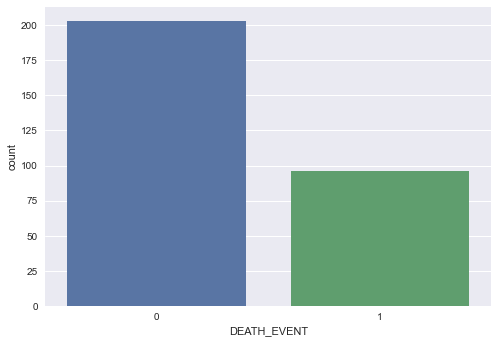

In [16]:
sns.countplot(x="DEATH_EVENT", data=df)
plt.show()

<h5>Verificando a presença de Outliers

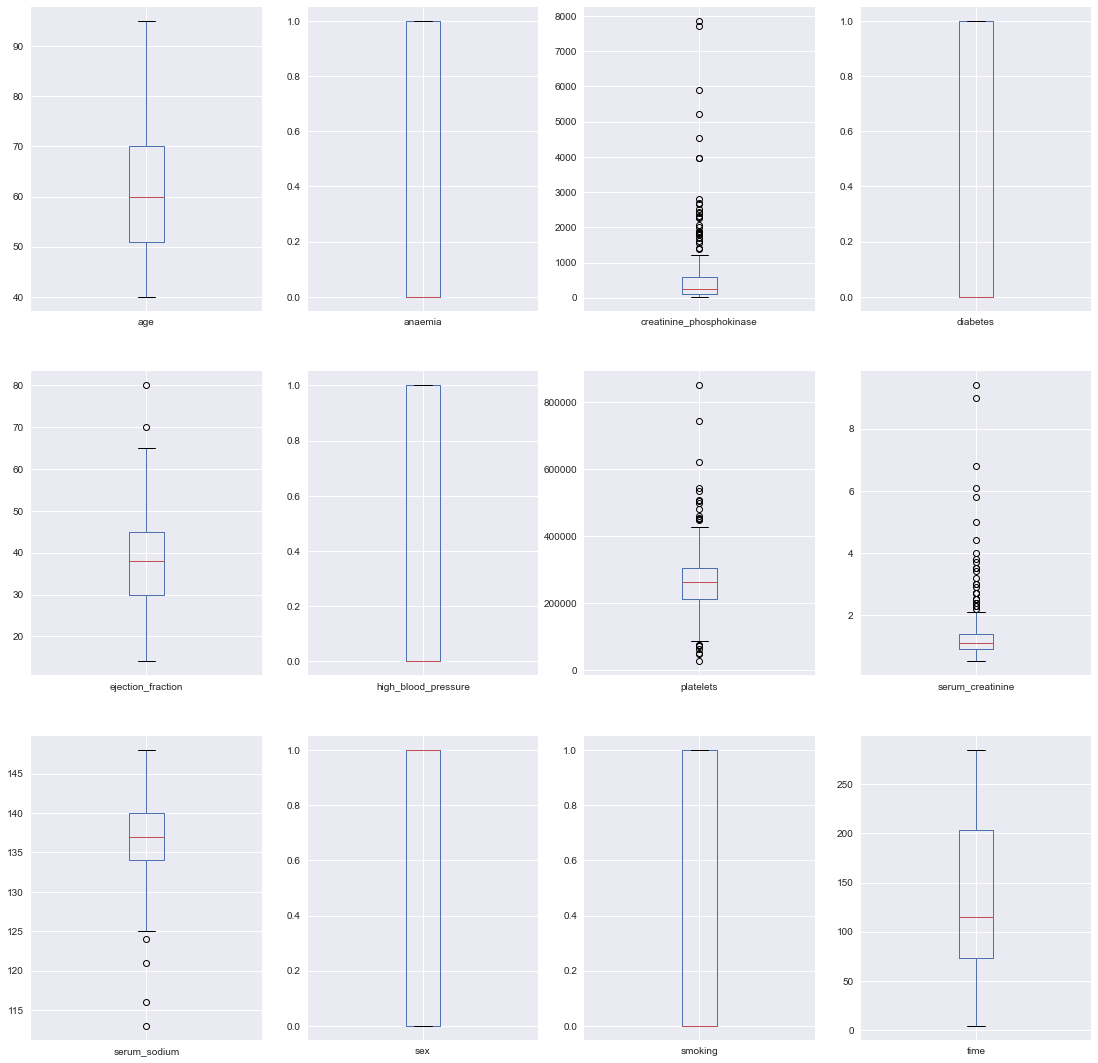

In [17]:
df.iloc[:,:-1].plot(kind='box', subplots=True, layout=(3,4), figsize=(19,19))
plt.show()

<h5>Tratando nossos Outliers

In [18]:
for i in df.iloc[:,:-1]:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1
    limite_superior= Q3+(1.5*IQR)
    limite_inferior = Q1-(1.5*IQR)
    
    df = df[(df[i]>=limite_inferior) & (df[i]<= limite_superior)]

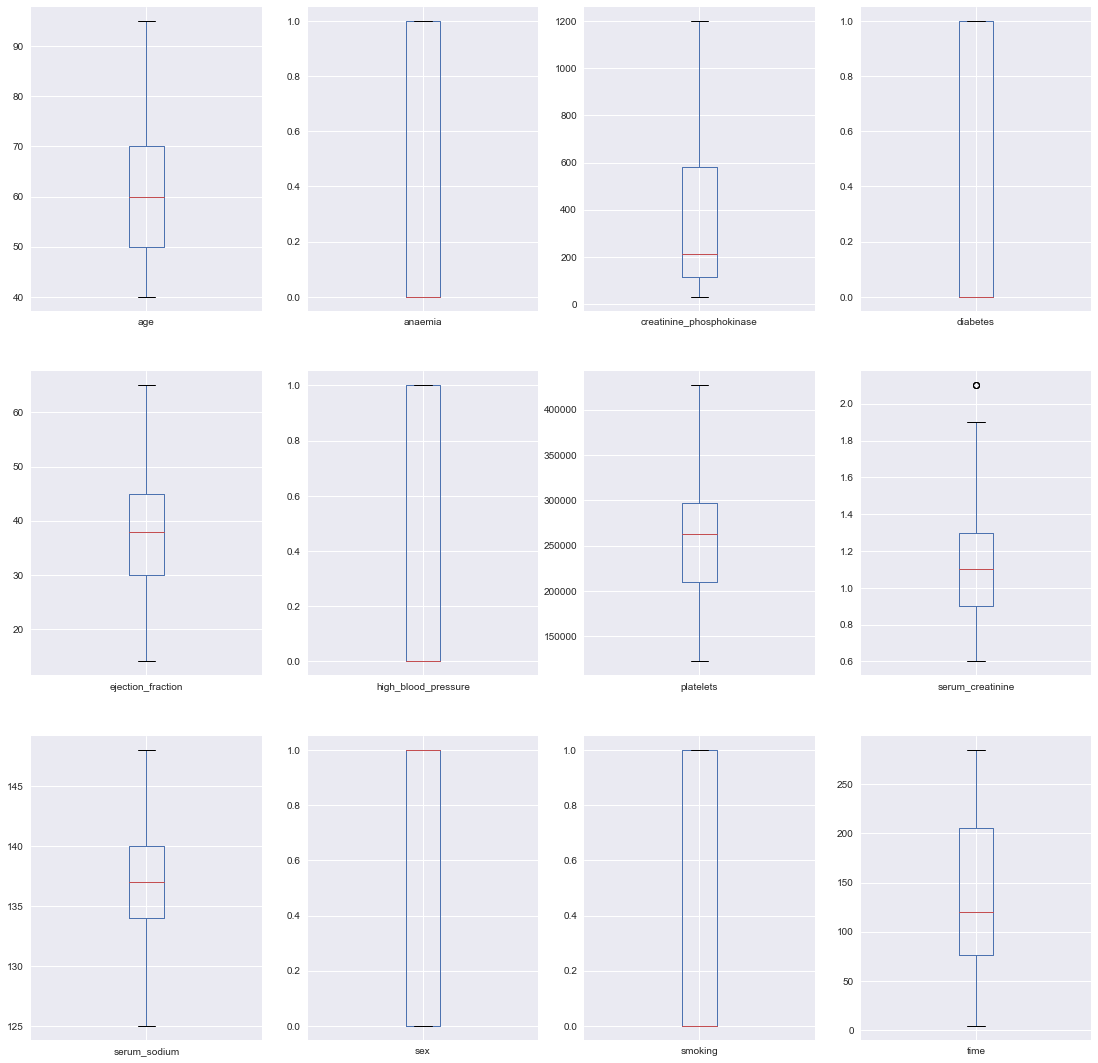

In [19]:
df.iloc[:,:-1].plot(kind='box', subplots=True, layout=(3,4), figsize=(19,19))
plt.show()

<h5>Correlação

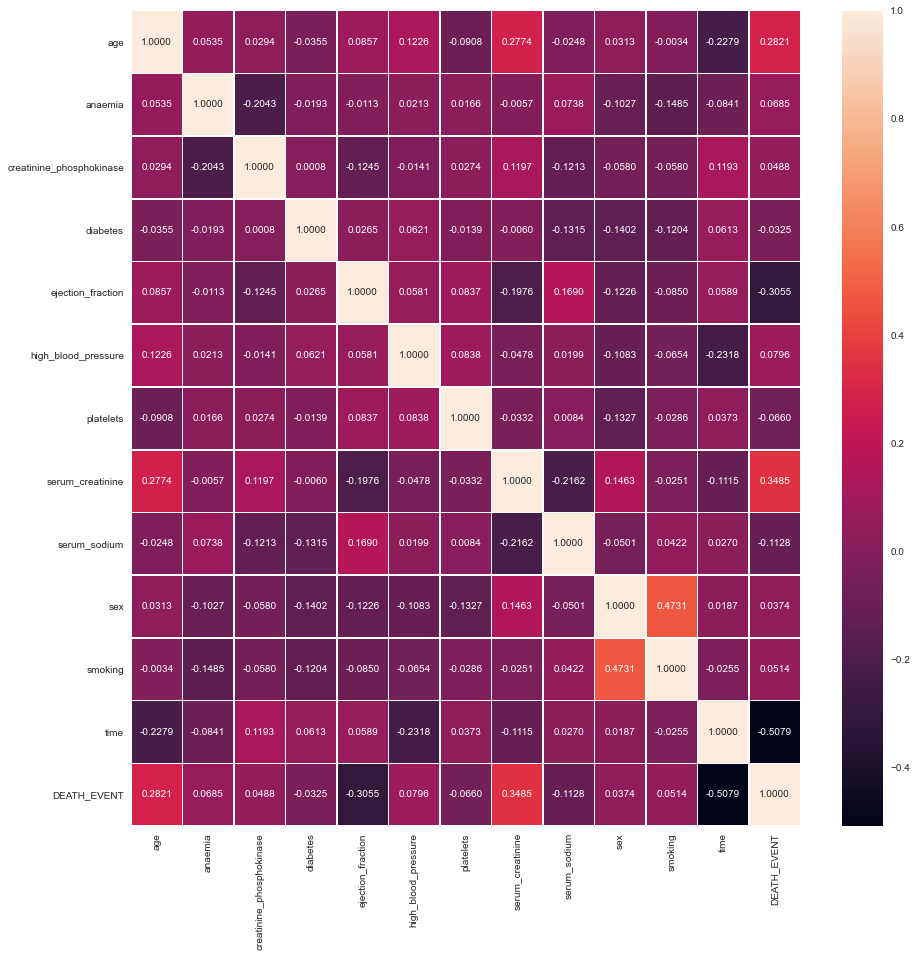

In [20]:
corr = df.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot = True, fmt=".4f", linewidths=.6)

plt.show()

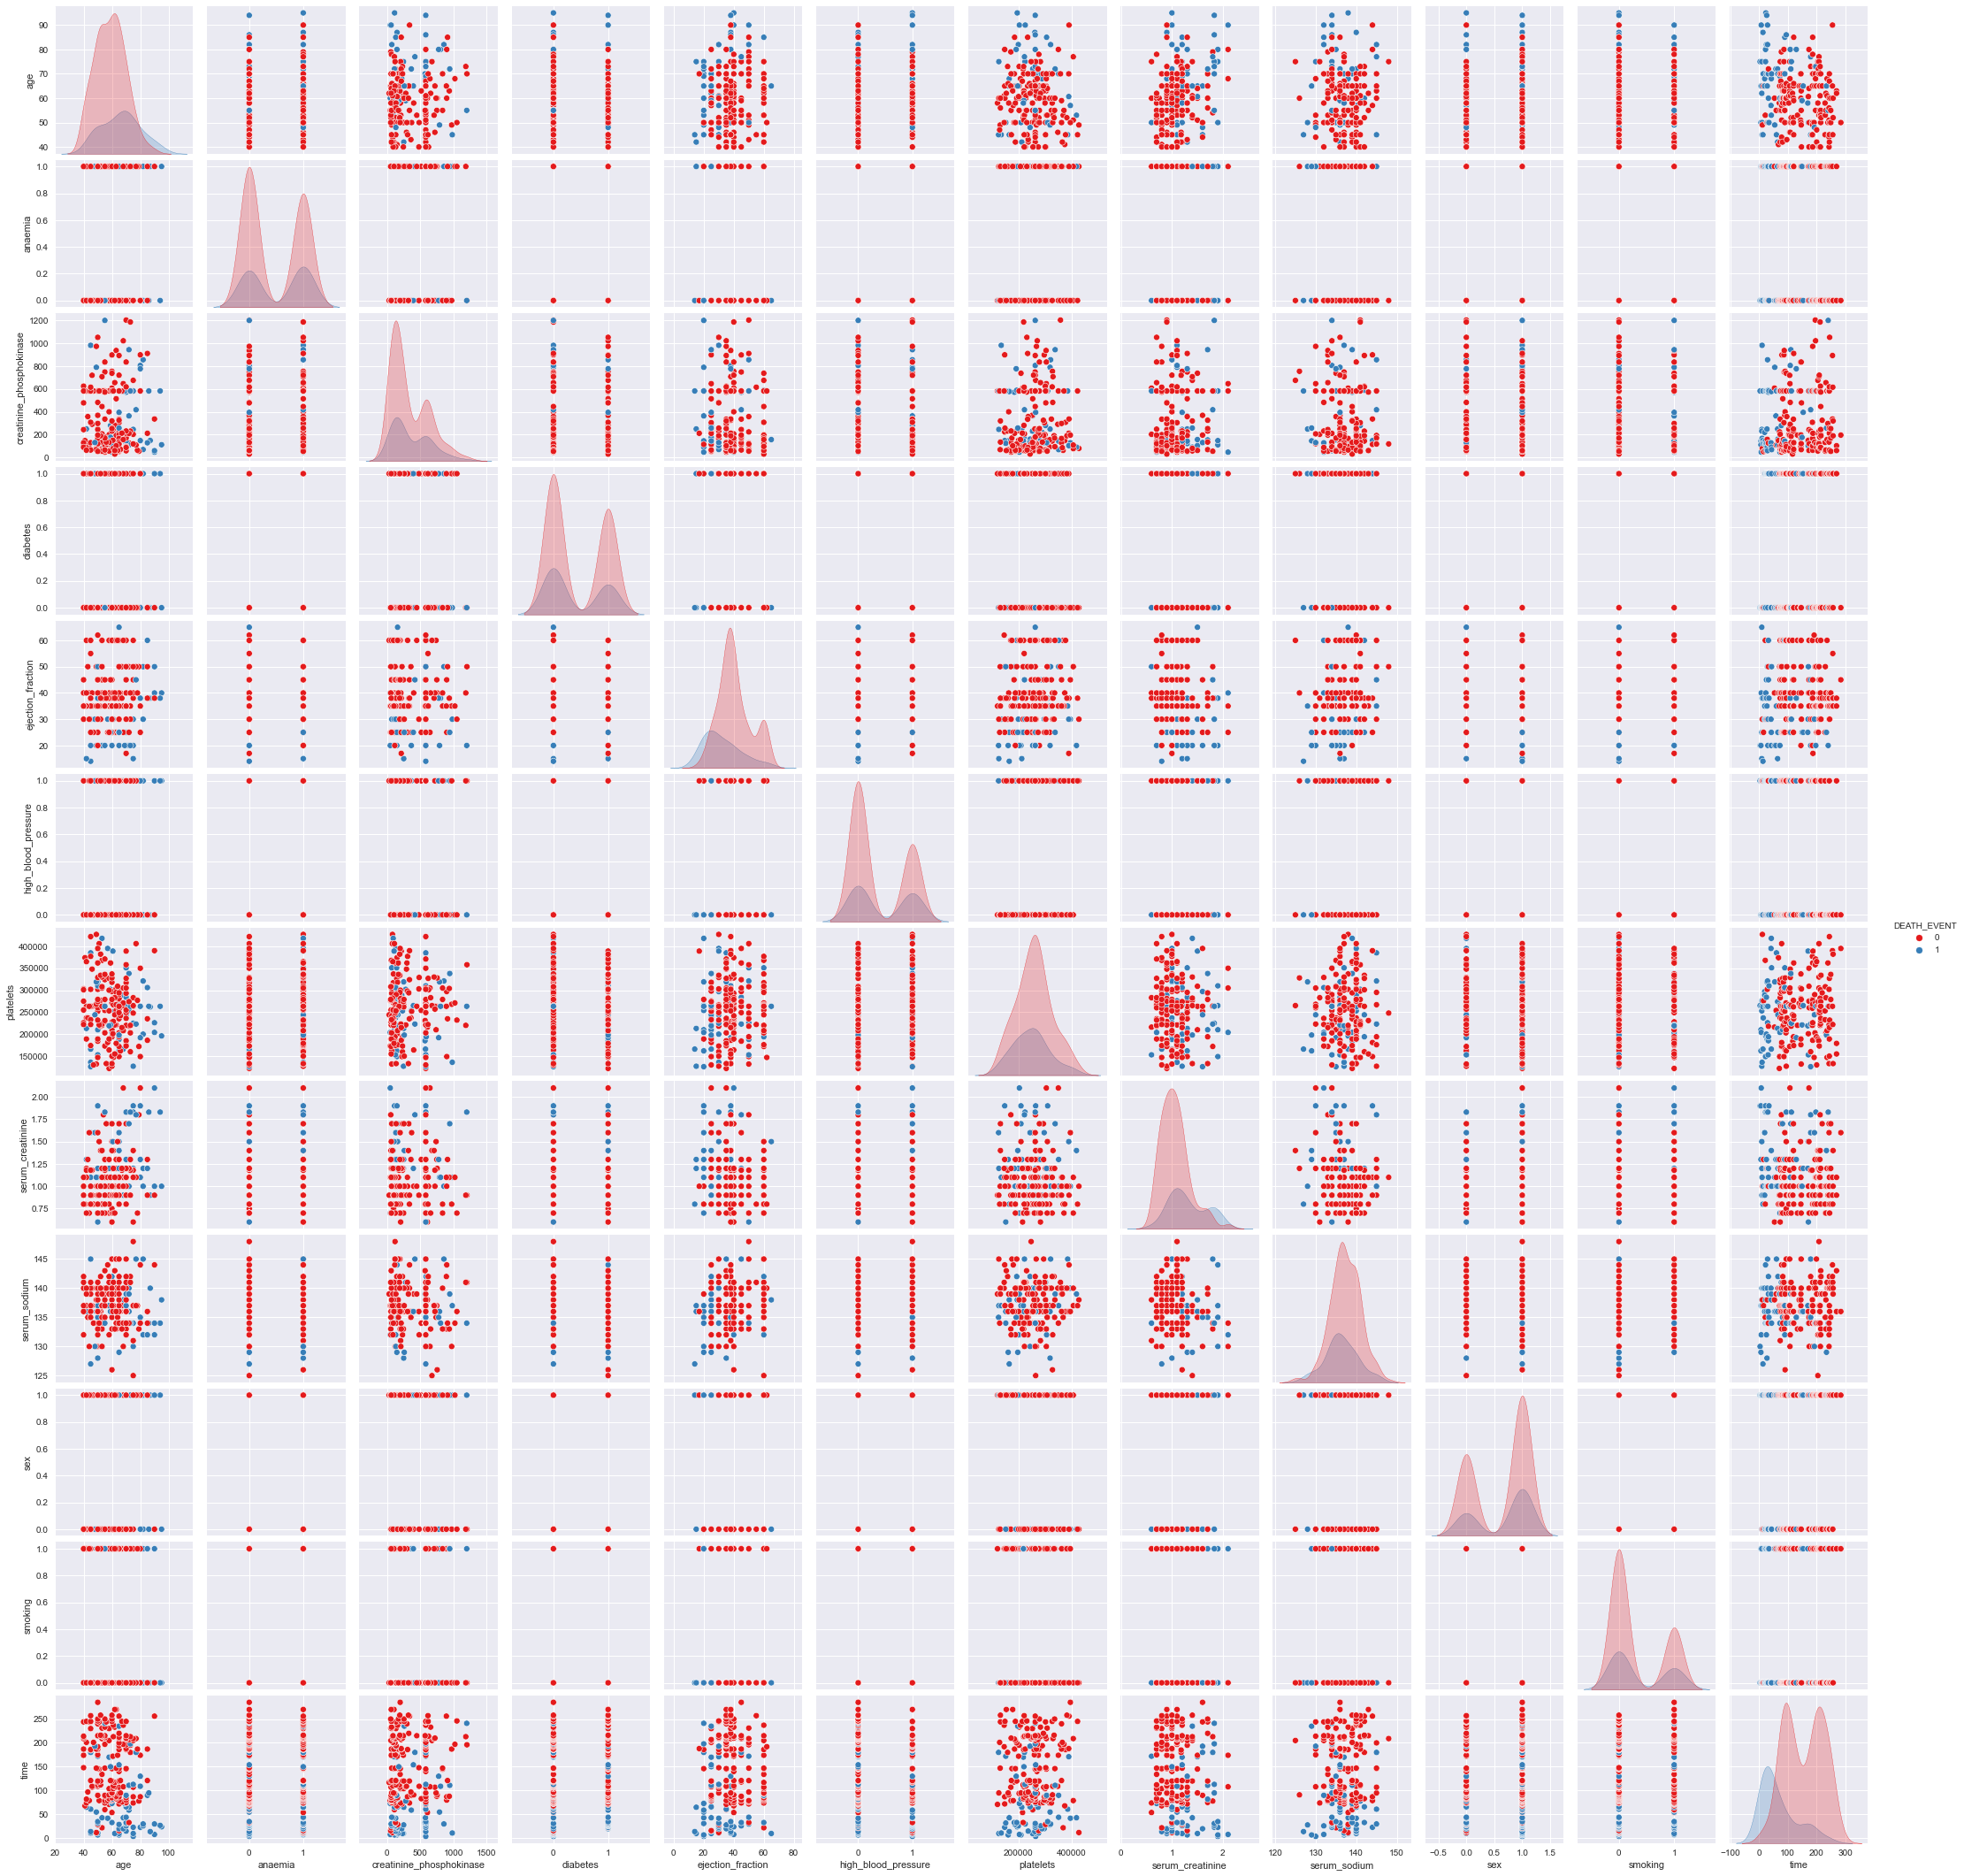

In [21]:
sns.pairplot(data=df, hue="DEATH_EVENT", palette="Set1")
plt.show()

<h5>Agrupando por idade e sexo nos casos onde houveram falecimento. Sexo feminino = 0, masculino =1

In [76]:
df[df["DEATH_EVENT"]==1].groupby(["age","sex"]).sum().iloc[:,0]


age     sex
42.000  0      1
45.000  1      1
48.000  0      1
49.000  1      0
50.000  0      1
        1      2
53.000  0      1
55.000  1      0
57.000  0      1
58.000  1      1
59.000  0      1
        1      1
60.000  0      1
        1      2
60.667  1      1
62.000  1      0
65.000  0      1
        1      1
68.000  1      2
69.000  1      0
70.000  0      3
        1      0
72.000  1      2
73.000  1      0
75.000  0      0
        1      2
77.000  1      1
80.000  0      0
        1      0
82.000  0      1
        1      0
85.000  1      0
86.000  0      0
87.000  1      1
90.000  1      2
94.000  1      0
95.000  0      1
Name: anaemia, dtype: int64

<h5> 

Text(0, 0.5, 'Quantidade')

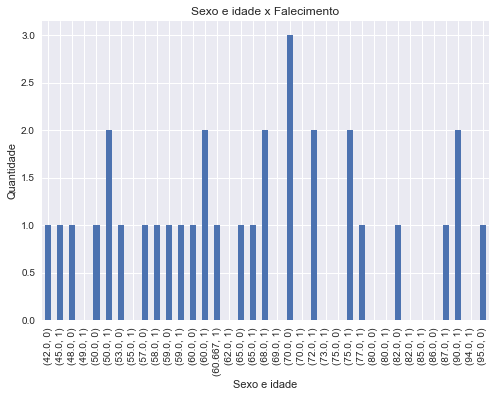

In [79]:
df[df["DEATH_EVENT"]==1].groupby(["age","sex"]).sum().iloc[:,0].plot.bar(title="Sexo e idade x Falecimento")
plt.xlabel("Sexo e idade")
plt.ylabel("Quantidade")
